# Example plotting script for COMBLE-MIP analysis

In [195]:
%run functions_plotting.py

## select simulations to plot
sim_keyword = '100m'

In [200]:
## load ERA5 fields
era5_1d, era5_2d = load_era5(PATH='../../data_files/')

## load DOE ARM site statistics
kazrkollias_dat = load_kazrkollias() 
kazrclough_dat = load_kazrclough() 
aeri_dat = load_aeri(t_filter = 0.5)

## load radiosondes
rs_dat = load_rs(t_filter = 6.)

## load MAC-LWP
maclwp_dat = load_maclwp(t_filter = 0.) 

## load MODIS, VIIRS, and SENTINEL retrievals
modis_dat    = load_modis(t_filter = 0.,sza_filter = 75.)
viirs_dat    = load_viirs(t_filter = 0.,sza_filter = 75.)
sentinel_dat = load_sentinel(t_filter = 0.,sza_filter = 75.)

## load CERES retrievals
ceres_dat = load_ceres(t_filter = 0.)

## load CALIPSO retrievals (note the increased time window)
calipso_dat = load_calipso(t_filter = 3.)

../../data_files/theta_temp_rh_sh_uvw_sst_along_trajectory_era5ml_28h_end_2020-03-13-18.nc
../../data_files/anxsondewnpnM1.b1.20200313.232200.cdf
../../data_files/anxsondewnpnM1.b1.20200313.172600.cdf
../../data_files/anxsondewnpnM1.b1.20200313.112600.cdf
../../data_files/anxsondewnpnM1.b1.20200313.052700.cdf


In [33]:
## load all simulations located in subfolders of the given directory
var_vec_1d = ['hfss','hfls','ts'] # variables with ERA5 (longer time axis)
var_vec_2d = ['theta','qv','ua','va']
df_col_1d,df_col_2d = load_sims('../../output_les/',var_vec_1d,var_vec_2d,t_shift=-2,keyword=sim_keyword)

../../output_les/dharma/sandbox/Lx25km_dx100m/DHARMA_LES_COMBLE-I.nc
../../output_les/dharma/sandbox/Lx25km_dx100m_progNa/DHARMA_LES_COMBLE-I.nc
../../output_les/wrf/sandbox/Lx25km_dx100m/WRF_LES_COMBLE-I_Lx25km_dx100m.nc
../../output_les/dharma/sandbox/Lx25km_dx100m/DHARMA_LES_COMBLE-I.nc
../../output_les/dharma/sandbox/Lx25km_dx100m_progNa/DHARMA_LES_COMBLE-I.nc
../../output_les/wrf/sandbox/Lx25km_dx100m/WRF_LES_COMBLE-I_Lx25km_dx100m.nc


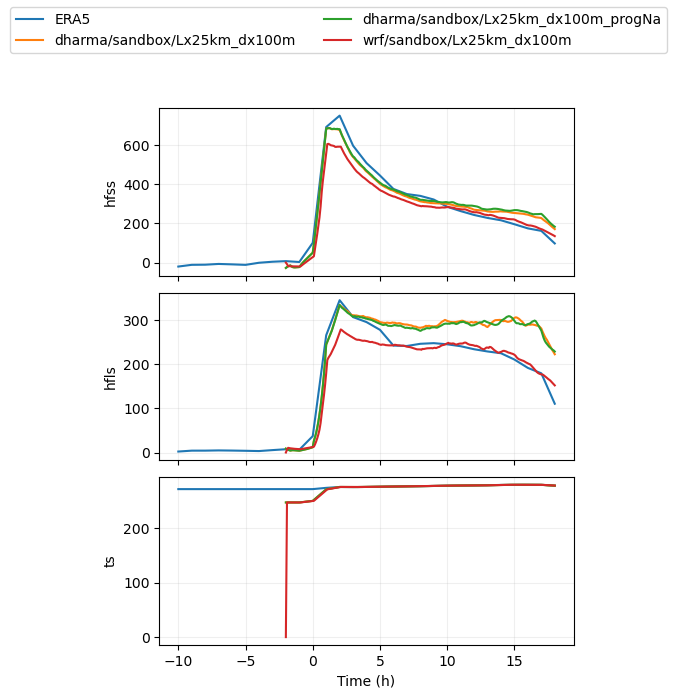

In [34]:
## plot variables that have only time dependence
plot_1d(pd.concat([df_col_1d,era5_1d]),var_vec_1d)

In [134]:
## load all simulations located in subfolders of the given directory
var_vec_1d = ['cwp','rwp','iwp','swp','gwp','cod','zi'] # variables without ERA5 (shorter time axis)
var_vec_2d = ['theta','qv','ua','va','ta']
df_col_1d,df_col_2d = load_sims('../../output_les/',var_vec_1d,var_vec_2d,t_shift=-2,keyword=sim_keyword)

../../output_les/dharma/sandbox/Lx25km_dx100m/DHARMA_LES_COMBLE-I.nc
../../output_les/dharma/sandbox/Lx25km_dx100m_progNa/DHARMA_LES_COMBLE-I.nc
../../output_les/wrf/sandbox/Lx25km_dx100m/WRF_LES_COMBLE-I_Lx25km_dx100m.nc
../../output_les/dharma/sandbox/Lx25km_dx100m/DHARMA_LES_COMBLE-I.nc
../../output_les/dharma/sandbox/Lx25km_dx100m_progNa/DHARMA_LES_COMBLE-I.nc
../../output_les/wrf/sandbox/Lx25km_dx100m/WRF_LES_COMBLE-I_Lx25km_dx100m.nc


Computing Liquid Water Path


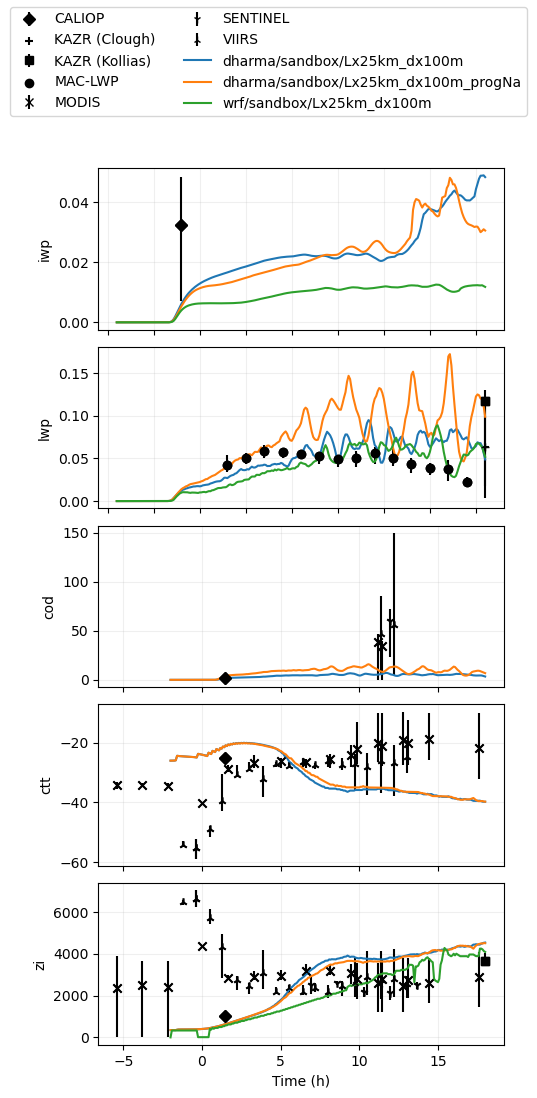

In [197]:
## plot variables that have only time dependence
plot_1d(pd.concat([df_col_1d,maclwp_dat,modis_dat,viirs_dat,sentinel_dat,kazrkollias_dat,kazrclough_dat,calipso_dat]),['iwp','lwp','cod','ctt','zi'])

Computing wind speed
Computing wind direction


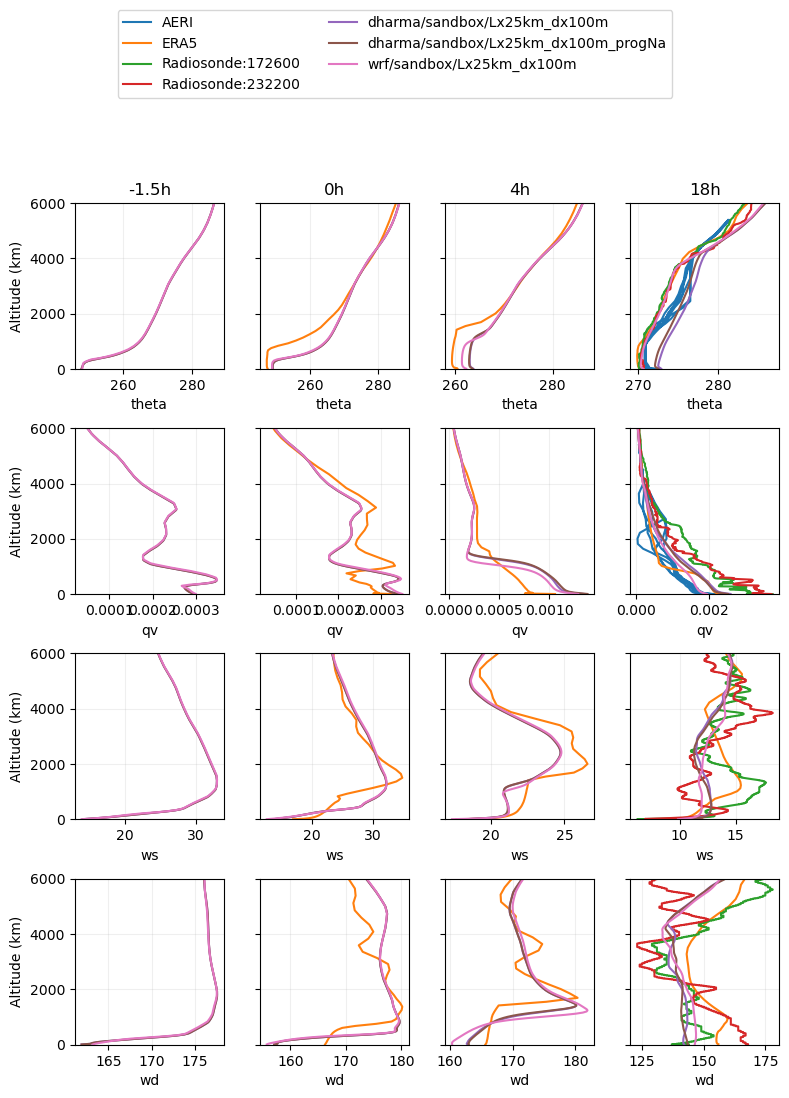

<Figure size 1000x600 with 0 Axes>

In [201]:
## plot all variables that have time and height dependence
#plot_2d(df_col_2d,var_vec_2d,[0,3,6,9,12,15,18],z_max=6000)

## example where ERA5 and radiosonde are included
plot_2d(pd.concat([df_col_2d,era5_2d,rs_dat,aeri_dat]),var_vec = ['theta','qv','ws','wd'],times=[-1.5,0,4,18],z_max=6000)